In [94]:
import os
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import scipy.sparse as sp
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, f1_score

In [95]:
import requests
def read_data_from_urls(url):
  """
  This function reads a raw github url, sends a request
  assumes a plain text file present at the url and returns
  the lines of a file
  """
  req = requests.get(url)
  req = req.text
  return req.splitlines()

In [96]:
train_data_real_url = "https://raw.githubusercontent.com/aanchan/CS6140-hw1-starter-code/main/question2/data/train/clean_real_train.txt"
train_data_fake_url = "https://raw.githubusercontent.com/aanchan/CS6140-hw1-starter-code/main/question2/data/train/clean_fake_train.txt"
valid_data_real_url = "https://raw.githubusercontent.com/aanchan/CS6140-hw1-starter-code/main/question2/data/dev/clean_real_dev.txt"
valid_data_fake_url = "https://raw.githubusercontent.com/aanchan/CS6140-hw1-starter-code/main/question2/data/dev/clean_fake_dev.txt"

In [97]:
real_news_train_lines = read_data_from_urls(train_data_real_url)

In [98]:
fake_news_train_lines = read_data_from_urls(train_data_fake_url)

In [99]:
combined_train_list = real_news_train_lines + fake_news_train_lines

In [100]:
len(combined_train_list)

2286

In [101]:
vect = CountVectorizer()
cv = vect.fit_transform(combined_train_list)
word_list = vect.get_feature_names_out()
count_list = cv.toarray().sum(axis=0)
print(dict(zip(word_list,count_list)))

{'00': 1, '000': 4, '10': 7, '100': 11, '100mln': 1, '10m': 1, '11': 6, '11yo': 1, '12': 7, '13': 5, '14': 3, '15': 1, '150': 1, '17': 1, '180': 1, '184': 4, '19': 1, '1920s': 1, '197': 1, '1990': 1, '20': 1, '20000': 1, '2008': 2, '2016': 9, '2017': 1, '2018': 1, '2020': 2, '20k': 1, '22': 1, '220': 1, '24': 1, '259': 1, '270': 1, '28': 1, '2gb': 1, '30': 2, '306': 1, '31k': 1, '32': 1, '34': 1, '34m': 1, '35': 2, '37': 1, '42': 2, '43': 1, '44': 2, '452000': 1, '457': 1, '45th': 3, '49': 1, '50': 1, '500': 1, '60': 3, '6th': 1, '70': 3, '75': 1, '750': 2, '75th': 2, '83': 1, '87': 1, '8th': 1, '90': 1, '90k': 1, '91': 1, '95': 1, '97yo': 1, 'aback': 2, 'abandon': 3, 'abandoned': 1, 'abandons': 1, 'abbott': 2, 'abc': 2, 'abductions': 1, 'abe': 4, 'abedin': 1, 'abetz': 1, 'ability': 1, 'able': 2, 'abortion': 1, 'abortions': 1, 'about': 58, 'abroad': 1, 'absolutely': 2, 'absurd': 1, 'abuse': 2, 'abusing': 1, 'academy': 1, 'accept': 2, 'accepting': 1, 'accepts': 3, 'accerate': 1, 'access

In [102]:
cv

<2286x4776 sparse matrix of type '<class 'numpy.int64'>'
	with 21896 stored elements in Compressed Sparse Row format>

In [103]:
num_train_real = len(real_news_train_lines)
num_train_fake = len(fake_news_train_lines)
# create label vectors for training data
y_train_real = np.ones(num_train_real)
y_train_fake = np.zeros(num_train_fake)
y_train = np.concatenate((y_train_real, y_train_fake), axis=0)

In [104]:
train_data_real = vect.transform(real_news_train_lines)
train_data_fake = vect.transform(fake_news_train_lines)
train_data = sp.vstack((train_data_real, train_data_fake))

In [105]:
train_data

<2286x4776 sparse matrix of type '<class 'numpy.int64'>'
	with 21896 stored elements in Compressed Sparse Row format>

In [106]:
clf = LogisticRegression(random_state=0, penalty='l1', solver='liblinear')

In [107]:
clf.fit(X=train_data, y=y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [108]:
coeff_l1 = clf.coef_
coeff_l1

array([[ 0.        , -0.8685531 , -2.44540044, ...,  0.        ,
         0.        ,  0.        ]])

In [109]:
clf.coef_.size

4776

In [110]:
clf_l2 = LogisticRegression(random_state=0, penalty='l2', solver='liblinear')

In [111]:
clf_l2.fit(X=train_data, y=y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [112]:
coeff_l2 = clf_l2.coef_
coeff_l2

array([[-0.09543424, -0.74532981, -1.19325418, ...,  0.03614307,
        -0.21448325, -0.29216763]])

In [91]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=ac77ff7787ff6fbe842b8a9c6dc5b47e253459a9d669ddf0eb1126df2392100e
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [113]:
from eli5 import show_weights
show_weights(clf, feature_names=vect.get_feature_names_out(),top=50)

Weight?,Feature
+2.418,australia
+2.320,<BIAS>
+2.298,trumps
+2.137,accept
+1.968,turnbull
+1.756,climate
+1.509,korea
+1.485,says
+1.439,ban
+1.342,scaramucci


In [114]:
tr = vect.transform(['why iranian american pastor held hostage in iran is voting for donald trump'])


In [115]:
clf.predict_proba(tr)

array([[0.83629576, 0.16370424]])

In [116]:
from eli5 import show_prediction
show_prediction(clf, 'why iranian american pastor held hostage in iran is voting for donald trump', vec=vect, feature_names=vect.get_feature_names_out())

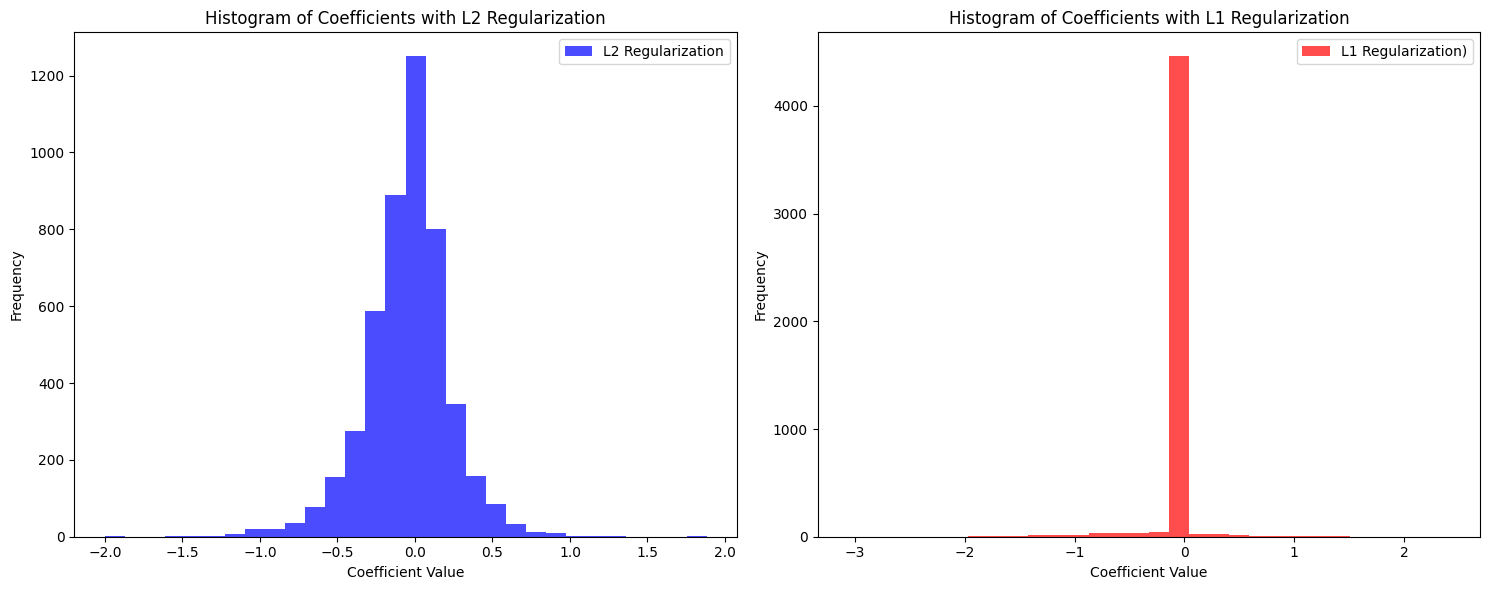

In [117]:
# Plot histograms of coefficients
coeff_l1_flat = np.array(coeff_l1).flatten()
coeff_l2_flat = np.array(coeff_l2).flatten()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# L1 Regularization
ax[1].hist(coeff_l1_flat, bins=30, color='red', alpha=0.7, label='L1 Regularization)')
ax[1].set_title('Histogram of Coefficients with L1 Regularization')
ax[1].set_xlabel('Coefficient Value')
ax[1].set_ylabel('Frequency')
ax[1].legend()

# L2 Regularization
ax[0].hist(coeff_l2_flat, bins=30, color='blue', alpha=0.7, label='L2 Regularization')
ax[0].set_title('Histogram of Coefficients with L2 Regularization')
ax[0].set_xlabel('Coefficient Value')
ax[0].set_ylabel('Frequency')
ax[0].legend()

plt.tight_layout()
plt.show()

Sparsity in L1 (Red): The histogram for L1 regularization has a pronounced peak at zero, it indicates that many coefficients were driven to zero. This is characteristic of L1 regularization, which tends to induce sparsity by setting many coefficients to zero, making it useful for feature selection.

Spread in L2 (Blue): The histogram for L2 regularization is more spread out and doesn't have as pronounced a peak at zero, it suggests that L2 regularization constrains the magnitudes of the coefficients without necessarily setting them to zero. This behavior prevents overfitting by ensuring that no coefficient becomes overly dominant.


In [118]:
# URLs
fake_news_url = "https://raw.githubusercontent.com/aanchan/CS6140-hw1-starter-code/main/data/clean_fake.txt"
real_news_url = "https://raw.githubusercontent.com/aanchan/CS6140-hw1-starter-code/main/data/clean_real.txt"

fake_news = read_data_from_urls(fake_news_url)
real_news = read_data_from_urls(real_news_url)

# Combine the datasets and create labels: 0 for fake, 1 for real
all_news = fake_news + real_news
labels = [0] * len(fake_news) + [1] * len(real_news)

# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_news).toarray()
y = np.array(labels)

X.shape, y.shape

((3266, 5799), (3266,))

In [119]:
# 1. No Regularization:

# Initialize storage for metrics
no_reg_metrics = {
    "precision": [],
    "recall": [],
    "f1": []
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation loop
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # No regularization
    clf = LogisticRegression(penalty='none', max_iter=10000).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    no_reg_metrics["precision"].append(precision_score(y_test, y_pred))
    no_reg_metrics["recall"].append(recall_score(y_test, y_pred))
    no_reg_metrics["f1"].append(f1_score(y_test, y_pred))

no_reg_metrics

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

{'precision': [0.8255208333333334,
  0.8691358024691358,
  0.8238095238095238,
  0.8531468531468531,
  0.8603491271820449],
 'recall': [0.8732782369146006,
  0.8712871287128713,
  0.8628428927680798,
  0.9037037037037037,
  0.8734177215189873],
 'f1': [0.8487282463186078,
  0.8702101359703337,
  0.8428745432399513,
  0.8776978417266187,
  0.8668341708542713]}

Precision: Values range from approximately 0.82 to 0.87. This indicates that the proportion of positive identifications that were actually correct is relatively high.

Recall: Values range from around 0.87 to 0.90. This suggests that the proportion of actual positives that were identified correctly is consistent across folds.

F1-Score: Values are around 0.84 to 0.88, showing a balance between precision and recall.

In [120]:
# 2. L2 Regularization:

# Initialize storage for metrics
l2_reg_metrics = {
    "precision": [],
    "recall": [],
    "f1": []
}

# Cross-validation loop
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # L2 regularization
    clf = LogisticRegression(penalty='l2', max_iter=10000).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    l2_reg_metrics["precision"].append(precision_score(y_test, y_pred))
    l2_reg_metrics["recall"].append(recall_score(y_test, y_pred))
    l2_reg_metrics["f1"].append(f1_score(y_test, y_pred))

l2_reg_metrics


{'precision': [0.8233830845771144,
  0.8532110091743119,
  0.8378995433789954,
  0.8564593301435407,
  0.861244019138756],
 'recall': [0.9118457300275482,
  0.9207920792079208,
  0.9152119700748129,
  0.8839506172839506,
  0.9113924050632911],
 'f1': [0.8653594771241829,
  0.8857142857142858,
  0.8748510131108462,
  0.8699878493317134,
  0.8856088560885609]}

Precision: Values range from approximately 0.82 to 0.86, which is quite similar to the "No Regularization" model. This indicates a consistent ability to correctly identify positive cases.

Recall: The values range from around 0.88 to 0.92, suggesting that the model has a consistent ability to identify all positive samples.

F1-Score: The scores hover around 0.87 to 0.89, showcasing a balance between precision and recall. These scores are slightly higher than the "No Regularization" model, indicating that L2 regularization might be adding some benefits in terms of model generalization.

In [121]:
# 3. L1 Regularization:

# Initialize storage for metrics
l1_reg_metrics = {
    "precision": [],
    "recall": [],
    "f1": []
}

# Cross-validation loop
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # L1 regularization
    clf = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    l1_reg_metrics["precision"].append(precision_score(y_test, y_pred))
    l1_reg_metrics["recall"].append(recall_score(y_test, y_pred))
    l1_reg_metrics["f1"].append(f1_score(y_test, y_pred))

l1_reg_metrics


{'precision': [0.7966101694915254,
  0.835214446952596,
  0.8237986270022883,
  0.8443396226415094,
  0.8422330097087378],
 'recall': [0.90633608815427,
  0.9158415841584159,
  0.8977556109725686,
  0.8839506172839506,
  0.8784810126582279],
 'f1': [0.8479381443298969,
  0.873671782762692,
  0.8591885441527447,
  0.8636911942098915,
  0.8599752168525403]}

Precision: Values range from approximately 0.80 to 0.84. While still relatively high, these values are slightly lower than those for the "No Regularization" and "L2 Regularization" models. This suggests that the model might be slightly more conservative in predicting positive cases.

Recall: The values range from around 0.88 to 0.91, which are consistent with the other models. This indicates that the model continues to capture most of the actual positive samples.

F1-Score: The scores hover around 0.85 to 0.87. These are slightly lower than the scores for "L2 Regularization", suggesting that while L1 offers sparsity, it might not be the optimal choice for this dataset in terms of overall performance.

Observations:

Precision:
L2 regularization maintains relatively high precision, similar to the scenario with no regularization.
L1 regularization shows a slightly lower precision compared to the other two.

Recall:
L2 regularization appears to achieve the highest recall among the three scenarios.
L1 and no regularization have similar recall values, but L1 has a slightly lower maximum recall.

F1-Score:
L2 regularization has the highest F1-scores, indicating a better balance of precision and recall compared to the other two scenarios.
The F1-scores for no regularization and L1 regularization are quite similar, but L2 slightly outperforms both.

L2 regularization seems to be the most beneficial among the three in terms of balancing precision and recall, as indicated by its highest F1-scores. It's particularly useful when we want to avoid overfitting while not completely zeroing out any features. L1 regularization achieves results quite similar to the no regularization scenario. However, it has the added benefit of feature selection by driving some coefficients to zero. In situations where interpretability and feature sparsity are crucial, L1 might be preferable.
No regularization performs reasonably well, but it might be susceptible to overfitting.

In [122]:
# 4. PCA with k=1000:

# Initialize storage for metrics
pca_1000_metrics = {
    "precision": [],
    "recall": [],
    "f1": []
}

# Cross-validation loop
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # PCA 1000
    pca = PCA(n_components=1000)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    clf = LogisticRegression(max_iter=10000).fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    pca_1000_metrics["precision"].append(precision_score(y_test, y_pred))
    pca_1000_metrics["recall"].append(recall_score(y_test, y_pred))
    pca_1000_metrics["f1"].append(f1_score(y_test, y_pred))

pca_1000_metrics

{'precision': [0.8077858880778589,
  0.8466819221967964,
  0.8344827586206897,
  0.8456057007125891,
  0.8547215496368039],
 'recall': [0.9146005509641874,
  0.9158415841584159,
  0.9052369077306733,
  0.8790123456790123,
  0.8936708860759494],
 'f1': [0.8578811369509044,
  0.8799048751486326,
  0.868421052631579,
  0.8619854721549637,
  0.8737623762376238]}

PCA with k=1000:
The precision scores range from about 0.81 to 0.85.
The recall scores are slightly higher, ranging from approximately 0.87 to 0.91.
F1-scores are slightly higher, ranging from 0.85 to 0.88.

In [123]:
# 5. PCA with k=100:

# Initialize storage for metrics
pca_100_metrics = {
    "precision": [],
    "recall": [],
    "f1": []
}

# Cross-validation loop
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # PCA 100
    pca = PCA(n_components=100)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    clf = LogisticRegression(max_iter=1000).fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    pca_100_metrics["precision"].append(precision_score(y_test, y_pred))
    pca_100_metrics["recall"].append(recall_score(y_test, y_pred))
    pca_100_metrics["f1"].append(f1_score(y_test, y_pred))

pca_100_metrics

{'precision': [0.7783132530120482,
  0.8375286041189931,
  0.8179723502304147,
  0.8495145631067961,
  0.8325123152709359],
 'recall': [0.8898071625344353,
  0.905940594059406,
  0.885286783042394,
  0.8641975308641975,
  0.8556962025316456],
 'f1': [0.8303341902313625,
  0.8703923900118906,
  0.8502994011976047,
  0.8567931456548347,
  0.8439450686641697]}

PCA with k=100: The precision scores range from approximately 0.78 to 0.85.The recall scores range from around 0.86 to 0.90.F1-scores range from 0.83 to 0.87.

PCA with k=1000 provides slightly better performance metrics than PCA with
k=100. This indicates that retaining more principal components (up to 1000) captures more of the data's variance, which can lead to better model performance.

When comparing PCA with L1 regularization, the dimensionality reduction using PCA (especially with k=1000) seems to perform slightly better in terms of F1-score.

The choice between PCA and L1 regularization would also depend on other factors, such as computational efficiency and the need for feature selection (L1 can provide feature selection by zeroing out certain coefficients).